# Equidistant classes and cost matrix

In this Notebook we test the performance of various models in a two dimensional dataset with three equidistant classes. The idea is to extend the dataset generator to incorporate a hierarchy on the class difficulty, and to evaluate models that consider a hierarchical cost that is not correlated to the intrinsic hierarchy of difficulty (e.g. a class should have more errors if it overlaps more with another class).

The tested 

The current data generator only generates Gaussian distributions in one dimension for two class problems, and two dimensions for three class problems.

# Dataset generator

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


class EquidistantDataset(object):
    def __init__(self, n_classes=3, random_state=42):
        self.n_classes = n_classes
        self.random_state = random_state
        
    def _initialise(self):
        if not hasattr(self, 'has_been_initialised'):
            
            # TODO come up with general formula
            if self.n_classes == 2:
                self.centers = np.array([[-0.5], [0.5]])
                self.n_features = self.n_classes - 1
            elif self.n_classes == 3:
                self.centers = np.array([
                    [0, 0.5/np.cos(np.radians(30))],
                    [-0.5, -0.5*np.tan(np.radians(30))],
                    [+0.5, -0.5*np.tan(np.radians(30))]])
                np.random.seed(self.random_state)
                self.rotation_angle = np.random.rand(1)
                self.rotation = np.array([[np.cos(self.rotation_angle), -np.sin(self.rotation_angle)],
                                          [np.sin(self.rotation_angle),  np.cos(self.rotation_angle)]
                                         ])
                self.centers = np.inner(self.rotation.reshape(2, 2), self.centers).T
                self.n_features = self.n_classes - 1
            else:
                self.centers = np.eye(self.n_classes)[np.arange(self.n_classes)]
                self.n_features = self.n_classes
            self.cluster_std = 0.5
            self.sample_iteration = 0
            self.has_been_initialised = True
        
    def sample(self, n_samples):
        self._initialise()
        self.sample_iteration += 1
        return make_blobs(n_samples=n_samples, n_features=self.n_features,
                          centers=self.centers, cluster_std=self.cluster_std,
                          shuffle=True,
                          random_state=self.random_state + self.sample_iteration,
                          return_centers=False)

## Example of two classes

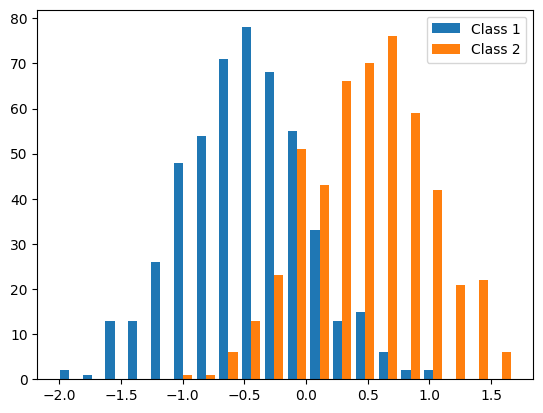

In [2]:
generator = EquidistantDataset(n_classes=2)
X, y = generator.sample(1000)

plt.hist([X[y==0].flatten(), X[y==1].flatten()], bins=20, label=[r'Class 1', r'Class 2'])
plt.legend()

In [3]:
centers = generator.centers

distance = np.zeros((centers.shape[0], centers.shape[0]))
for i in range(centers.shape[0]):
    for j in range(centers.shape[0]):
        distance[i,j] = np.sqrt(np.sum((centers[i] - centers[j])**2))

print(distance)

[[0. 1.]
 [1. 0.]]


## Example of three classes

/tmp/ipykernel_62121/3984132691.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


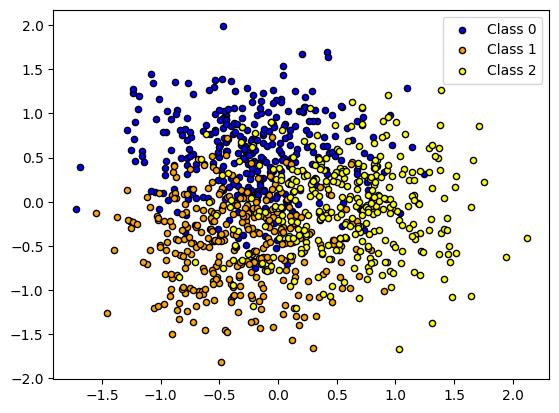

In [4]:
generator = EquidistantDataset(n_classes=3)
X_train, y_train = generator.sample(1000)

colors = ['blue', 'orange', 'yellow']

for i, color in enumerate(colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train[idx, 0],
        X_train[idx, 1],
        c=color,
        label='Class ' + str(i),
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.legend()

In [5]:
centers = generator.centers

distance = np.zeros((centers.shape[0], centers.shape[0]))
for i in range(centers.shape[0]):
    for j in range(centers.shape[0]):
        distance[i,j] = np.sqrt(np.sum((centers[i] - centers[j])**2))

print(distance)

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


## Example of four classes

/tmp/ipykernel_62121/43134139.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


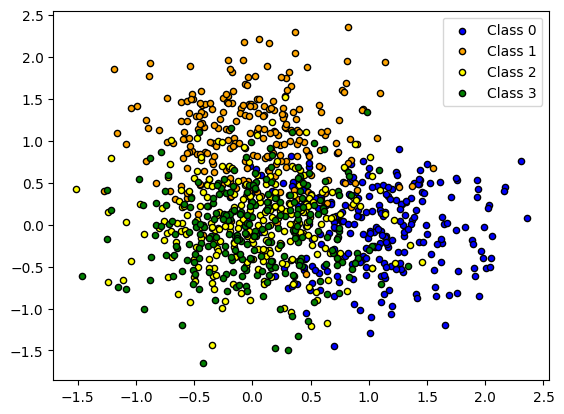

In [6]:
generator = EquidistantDataset(n_classes=4)
X_train, y_train = generator.sample(1000)

colors = ['blue', 'orange', 'yellow', 'green']

for i, color in enumerate(colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train[idx, 0],
        X_train[idx, 1],
        c=color,
        label='Class ' + str(i),
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.legend()

In [7]:
centers = generator.centers

distance = np.zeros((centers.shape[0], centers.shape[0]))
for i in range(centers.shape[0]):
    for j in range(centers.shape[0]):
        distance[i,j] = np.sqrt(np.sum((centers[i] - centers[j])**2))

print(distance)

[[0.         1.41421356 1.41421356 1.41421356]
 [1.41421356 0.         1.41421356 1.41421356]
 [1.41421356 1.41421356 0.         1.41421356]
 [1.41421356 1.41421356 1.41421356 0.        ]]


## Example of seven classes

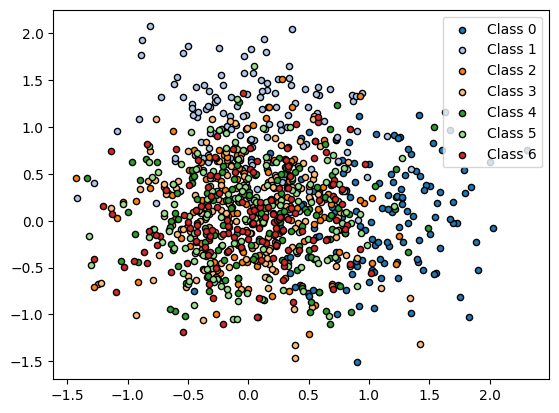

In [8]:
n_classes = 7

generator = EquidistantDataset(n_classes=n_classes)
X_train, y_train = generator.sample(1000)

colors = ['blue', 'orange', 'yellow', 'green',
          'cyan', 'red', 'black', 'white']

colors = plt.get_cmap('tab20')

for i in range(generator.n_classes):
    color = colors.colors[i]
    idx = np.where(y_train == i)
    plt.scatter(
        X_train[idx, 0],
        X_train[idx, 1],
        c=[color,], #[color,]*sum(y_train == i),
        label='Class ' + str(i),
        #cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.legend()

In [9]:
centers = generator.centers

distance = np.zeros((centers.shape[0], centers.shape[0]))
for i in range(centers.shape[0]):
    for j in range(centers.shape[0]):
        distance[i,j] = np.sqrt(np.sum((centers[i] - centers[j])**2))

print(distance)

[[0.         1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356]
 [1.41421356 0.         1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356]
 [1.41421356 1.41421356 0.         1.41421356 1.41421356 1.41421356
  1.41421356]
 [1.41421356 1.41421356 1.41421356 0.         1.41421356 1.41421356
  1.41421356]
 [1.41421356 1.41421356 1.41421356 1.41421356 0.         1.41421356
  1.41421356]
 [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 0.
  1.41421356]
 [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  0.        ]]


# Decision tree

Now we test the performance of a scikit-learn decision tree on the generated dataset.

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

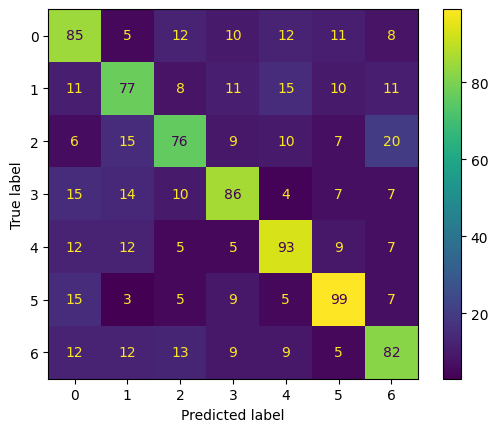

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_test, y_test = generator.sample(1000)
predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Multiple repetitions

The dataset generator has some random components, here we repeat the generation multiple times and aggregate the performance of each decision tree.

In [12]:
n_repetitions = 100
n_samples = 1000

cm_list = []
for r in range(n_repetitions):
    generator = EquidistantDataset(n_classes=generator.n_classes, random_state=100+r)
    X_train, y_train = generator.sample(n_samples)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    X_test, y_test = generator.sample(n_samples)
    predictions = clf.predict(X_test)

    cm_list.append(confusion_matrix(y_test, predictions))

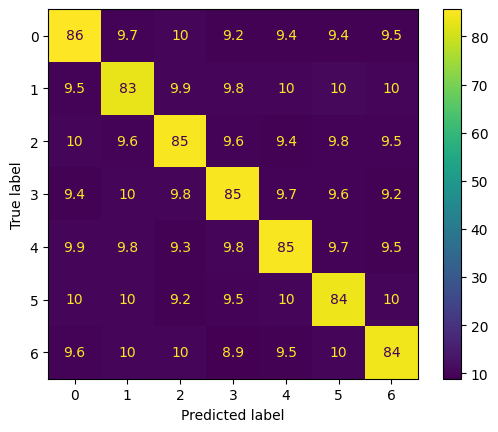

In [13]:
disp = ConfusionMatrixDisplay(np.mean(cm_list, axis=0))
disp.plot()

# PyTorch Multinomial Logistic Regression

We will use in the following experiments a Multinomial Logistic Regression implemented with PyTorch and using skorch to use the model as a scikit-learn probabilistic classifier.

In [14]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, generator.n_classes)
        
    def forward(self, x):
        x = F.softmax(self.layer1(x), dim=1)
        return x

    from skorch import NeuralNetBinaryClassifier, NeuralNetClassifier

model = NeuralNetClassifier(
    Model(input_dim=generator.n_features),
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    lr=0.0001,
    max_epochs=500,
    batch_size=10,
    callbacks=[('estoper', EarlyStopping(monitor='valid_loss',
                                         patience = 50,
                                         threshold = 0.01,
                                         threshold_mode='rel',
                                         lower_is_better=True))]
)

print(model)

<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=Model(
    (layer1): Linear(in_features=7, out_features=7, bias=True)
  ),
)


## Numpy arrays to tensors

PyTorch models require PyTorch tensors in order to train. Here we convert every numpy array into a PyTorch tensor.

In [15]:
X_train_tensor = Variable(torch.from_numpy(X_train)).float()
y_train_tensor = Variable(torch.from_numpy(y_train)).long()
X_test_tensor  = Variable(torch.from_numpy(X_test)).float()
y_test_tensor  = Variable(torch.from_numpy(y_test)).long()

In [16]:
model.fit(X_train_tensor, y_train_tensor)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9533       0.0650        1.9551  0.0881
      2        1.9522       0.0650        1.9541  0.0671
      3        1.9511       0.0700        1.9531  0.0614
      4        1.9499       0.0750        1.9520  0.0578
      5        1.9488       0.0850        1.9510  0.0544
      6        1.9477       0.0850        1.9499  0.0542
      7        1.9465       0.0950        1.9488  0.0537
      8        1.9454       0.1150        1.9478  0.0538
      9        1.9442       0.1250        1.9467  0.0538
     10        1.9431       0.1250        1.9456  0.0545
     11        1.9419       0.1350        1.9445  0.0716
     12        1.9407       0.1500        1.9434  0.0593
     13        1.9395       0.1500        1.9423  0.0899
     14        1.9383       0.1600        1.9411  0.0580
     15        1.9371       0.1750        1.9400  0.0527
     16        1.9359       0.1

    103        1.8178       0.5000        1.8292  0.0592
    104        1.8164       0.5100        1.8280  0.0592
    105        1.8150       0.5150        1.8268  0.0588
    106        1.8137       0.5150        1.8255  0.0578
    107        1.8123       0.5150        1.8243  0.0564
    108        1.8110       0.5150        1.8231  0.0564
    109        1.8097       0.5200        1.8218  0.0566
    110        1.8083       0.5200        1.8206  0.0576
    111        1.8070       0.5200        1.8194  0.0559
    112        1.8056       0.5300        1.8182  0.0553
    113        1.8043       0.5300        1.8169  0.0554
    114        1.8030       0.5350        1.8157  0.0554
    115        1.8016       0.5450        1.8145  0.0552
    116        1.8003       0.5500        1.8133  0.0556
    117        1.7990       0.5500        1.8121  0.0562
    118        1.7977       0.5550        1.8109  0.0560
    119        1.7963       0.5550        1.8097  0.0576
    120        1.7950       0.5

    210        1.6899       0.6150        1.7145  0.0612
    211        1.6889       0.6150        1.7136  0.0606
    212        1.6879       0.6150        1.7127  0.0573
    213        1.6869       0.6150        1.7119  0.0557
    214        1.6859       0.6150        1.7110  0.0549
    215        1.6849       0.6150        1.7101  0.0545
    216        1.6840       0.6150        1.7093  0.0577
    217        1.6830       0.6150        1.7084  0.0546
    218        1.6820       0.6200        1.7076  0.0541
    219        1.6810       0.6200        1.7067  0.0549
    220        1.6801       0.6200        1.7059  0.0548
    221        1.6791       0.6250        1.7050  0.0547
    222        1.6782       0.6250        1.7042  0.0545
    223        1.6772       0.6250        1.7033  0.0544
    224        1.6763       0.6250        1.7025  0.0544
    225        1.6753       0.6250        1.7017  0.0547
    226        1.6744       0.6250        1.7009  0.0547
    227        1.6735       0.6

    319        1.6040       0.6500        1.6394  0.0552
    320        1.6034       0.6500        1.6389  0.0553
    321        1.6029       0.6500        1.6384  0.0552
    322        1.6023       0.6600        1.6379  0.0552
    323        1.6017       0.6600        1.6374  0.0552
    324        1.6011       0.6600        1.6369  0.0551
    325        1.6005       0.6600        1.6364  0.0548
    326        1.5999       0.6600        1.6359  0.0553
    327        1.5994       0.6600        1.6354  0.0551
    328        1.5988       0.6600        1.6349  0.0550
    329        1.5982       0.6600        1.6344  0.0550
    330        1.5977       0.6600        1.6339  0.0551
    331        1.5971       0.6600        1.6334  0.0553
    332        1.5965       0.6600        1.6330  0.0551
    333        1.5960       0.6600        1.6325  0.0550
    334        1.5954       0.6600        1.6320  0.0554
    335        1.5949       0.6600        1.6315  0.0554
    336        1.5943       0.6

    428        1.5539       0.6650        1.5965  0.0568
    429        1.5535       0.6650        1.5962  0.0565
    430        1.5532       0.6650        1.5959  0.0616
    431        1.5528       0.6650        1.5956  0.0568
    432        1.5525       0.6650        1.5953  0.0611
    433        1.5521       0.6650        1.5950  0.0608
    434        1.5518       0.6650        1.5947  0.0542
    435        1.5514       0.6650        1.5944  0.0543
    436        1.5511       0.6650        1.5942  0.0543
    437        1.5508       0.6650        1.5939  0.0543
    438        1.5504       0.6650        1.5936  0.0548
    439        1.5501       0.6650        1.5933  0.0543
    440        1.5498       0.6650        1.5930  0.0545
    441        1.5494       0.6650        1.5928  0.0557
    442        1.5491       0.6650        1.5925  0.0545
    443        1.5488       0.6650        1.5922  0.0548
    444        1.5484       0.6650        1.5919  0.0549
    445        1.5481       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Model(
    (layer1): Linear(in_features=7, out_features=7, bias=True)
  ),
)

In [17]:
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary_pytorch(X, y, model):
    feature_1, feature_2 = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max()),
        np.linspace(X[:, 1].min(), X[:, 1].max())
    )

    feature_1 = Variable(torch.from_numpy(feature_1)).float()
    feature_2 = Variable(torch.from_numpy(feature_2)).float()
    grid = Variable(torch.from_numpy(np.vstack([feature_1.ravel(), feature_2.ravel()]).T)).float()

    y_pred = np.reshape(model.predict(grid), feature_1.shape)
    display = DecisionBoundaryDisplay(
        xx0=feature_1, xx1=feature_2, response=y_pred
    )
    display.plot()
    plt.axis("tight")

    colors = ['blue', 'green', 'yellow']

    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label='Class ' + str(i),
            edgecolor="black",
            s=20,
        )
    plt.legend()
    
#plot_decision_boundary_pytorch(X_test, y_test, model)

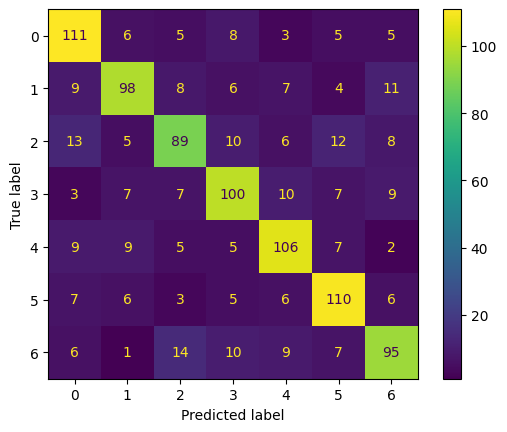

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test_tensor)

cm = confusion_matrix(y_test_tensor, predictions)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

# Train a neural network with specified loss

## True class absolute loss

The following is an example defining an absolute loss, only for the true positive label

$$
\Psi (\mathbf{y}, \mathbf{q}) = 1 - \sum_{i=1}^K y_i*q_i  \qquad \in [0, 1]
$$

which for a perfect prediction for $y_i = 1$ and $q_i = 1$ has the smallest loss $\Psi (\mathbf{y}, \mathbf{q}) = 0$.

In [19]:
class TrueClassAbsoluteLoss(nn.Module):
    def __init__(self):
        super(TrueClassAbsoluteLoss, self).__init__()
    
    def forward(self, output, target):
        target = torch.LongTensor(target)
        target = nn.functional.one_hot(target, num_classes=generator.n_classes).float()
        loss = torch.einsum('ij,ij->i', target, output)
        #print(target)
        #print(output)
        #print(loss)
        loss = 1 - loss.mean()
        return loss


model = NeuralNetClassifier(
    Model(input_dim=generator.n_features),
    criterion=TrueClassAbsoluteLoss,
    optimizer=torch.optim.Adam,
    lr=0.001,
    max_epochs=500,
    batch_size=10,
    verbose=1,
    callbacks=[('estoper', EarlyStopping(monitor='valid_loss',
                                         patience = 10,
                                         threshold = 0.01,
                                         threshold_mode='rel',
                                         lower_is_better=True))]
)

X_train_tensor = Variable(torch.from_numpy(X_train)).float()
y_train_tensor = Variable(torch.from_numpy(y_train)).long()
X_test_tensor  = Variable(torch.from_numpy(X_test)).float()
y_test_tensor  = Variable(torch.from_numpy(y_test)).long()

model.fit(X_train_tensor, y_train_tensor)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8505       0.2250        0.8435  0.0658
      2        0.8381       0.3000        0.8313  0.0647
      3        0.8249       0.3200        0.8183  0.0646
      4        0.8109       0.3500        0.8046  0.0647
      5        0.7962       0.3750        0.7905  0.0648
      6        0.7811       0.3900        0.7761  0.0647
      7        0.7657       0.4250        0.7617  0.0647
      8        0.7502       0.4450        0.7474  0.0649
      9        0.7347       0.4550        0.7333  0.0651
     10        0.7194       0.4800        0.7196  0.0664
     11        0.7044       0.4950        0.7063  0.0654
     12        0.6898       0.5100        0.6935  0.0658
     13        0.6755       0.5150        0.6811  0.0655
     14        0.6617       0.5300        0.6692  0.0719
     15        0.6482       0.5350        0.6577  0.0686
     16        0.6352       0.5

    106        0.3270       0.6700        0.3891  0.0732
    107        0.3263       0.6700        0.3886  0.0702
    108        0.3256       0.6700        0.3881  0.0702
    109        0.3249       0.6700        0.3876  0.0672
    110        0.3242       0.6700        0.3871  0.0703
    111        0.3236       0.6700        0.3866  0.0704
    112        0.3230       0.6700        0.3862  0.0703
    113        0.3223       0.6700        0.3857  0.0705
    114        0.3217       0.6650        0.3853  0.0686
    115        0.3211       0.6650        0.3848  0.0705
    116        0.3205       0.6650        0.3844  0.0673
    117        0.3199       0.6650        0.3840  0.0674
    118        0.3193       0.6650        0.3835  0.0675
    119        0.3187       0.6650        0.3831  0.0683
    120        0.3182       0.6650        0.3827  0.0675
    121        0.3176       0.6650        0.3823  0.0677
    122        0.3171       0.6650        0.3819  0.0680
    123        0.3165       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Model(
    (layer1): Linear(in_features=7, out_features=7, bias=True)
  ),
)

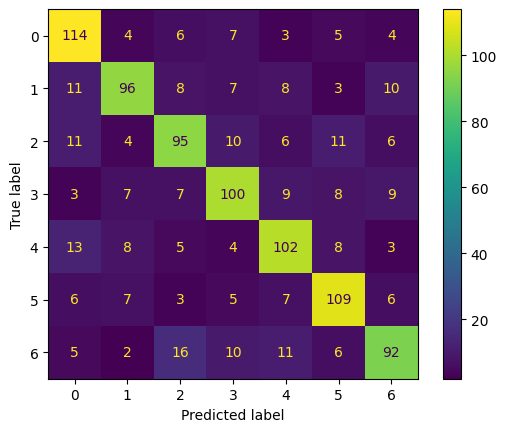

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test_tensor)

cm = confusion_matrix(y_test_tensor, predictions)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [21]:
#plot_decision_boundary_pytorch(X_test, y_test, model)

## Cross entropy


The following is an example defining cross entropy, only for the true positive label

$$
\Psi (\mathbf{y}, \mathbf{q}) = - \sum_{i=1}^K y_i*q_i \qquad \in [0, \infty)
$$

which for a perfect prediction for $y_i = 1$ and $q_i = 1$ has the smallest loss $\Psi (\mathbf{y}, \mathbf{q}) = 0$.

In [22]:
class CrossEntropyLoss(nn.Module):
    def __init__(self):
        super(CrossEntropyLoss, self).__init__()
    
    def forward(self, output, target):
        target = torch.LongTensor(target)
        target = nn.functional.one_hot(target, num_classes=generator.n_classes).float()
        loss = -torch.einsum('ij,ij->i', target, torch.log(output))
        #print(target)
        #print(output)
        #print(loss)
        loss = loss.mean()
        return loss

model = NeuralNetClassifier(
    Model(input_dim=generator.n_features),
    #criterion=torch.nn.BCEWithLogitsLoss,
    criterion=CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    lr=0.001,
    max_epochs=500,
    batch_size=10,
    verbose=1,
    callbacks=[('estoper', EarlyStopping(monitor='valid_loss',
                                         patience = 10,
                                         threshold = 0.01,
                                         threshold_mode='rel',
                                         lower_is_better=True))]
)

X_train_tensor = Variable(torch.from_numpy(X_train)).float()
y_train_tensor = Variable(torch.from_numpy(y_train)).long()
X_test_tensor  = Variable(torch.from_numpy(X_test)).float()
y_test_tensor  = Variable(torch.from_numpy(y_test)).long()

model.fit(X_train_tensor, y_train_tensor)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.0087       0.1900        1.9736  0.0703
      2        1.9292       0.2250        1.9020  0.0679
      3        1.8550       0.2700        1.8348  0.0725
      4        1.7852       0.3200        1.7719  0.0704
      5        1.7196       0.3950        1.7129  0.0702
      6        1.6580       0.4500        1.6578  0.0702
      7        1.6002       0.5000        1.6064  0.0710
      8        1.5461       0.5350        1.5584  0.0667
      9        1.4956       0.5650        1.5138  0.0667
     10        1.4483       0.5850        1.4723  0.0669
     11        1.4042       0.6150        1.4338  0.0672
     12        1.3630       0.6350        1.3980  0.0668
     13        1.3247       0.6550        1.3648  0.0666
     14        1.2889       0.6550        1.3341  0.0666
     15        1.2556       0.6500        1.3055  0.0664
     16        1.2245       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Model(
    (layer1): Linear(in_features=7, out_features=7, bias=True)
  ),
)

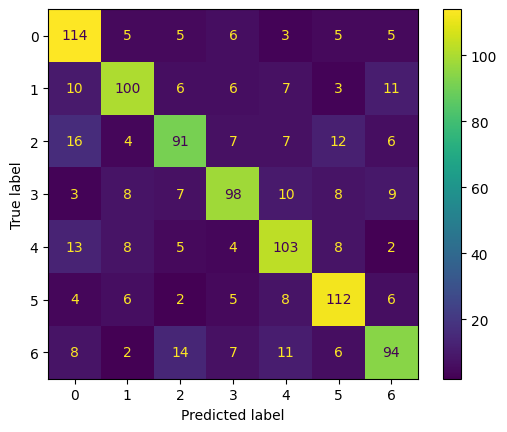

In [23]:
predictions = model.predict(X_test_tensor)

cm = confusion_matrix(y_test_tensor, predictions)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [24]:
#plot_decision_boundary_pytorch(X_test, y_test, model)

# Loss based on a cost matrix

Having a true label in a one-hot-encoding vector

$$
\mathbf{y} = [y_1, y_2, \dots, y_K]
$$

a cost matrix where each row is a true class and every column is the predicted class

$$
\mathbf{C} = \begin{bmatrix}
c_{1,1} & c_{1,2} & \dots  & c_{1,K} \\
c_{2,1} & c_{2,2} & \dots  & c_{2,K} \\
\vdots  & \vdots  & \ddots & \vdots \\
c_{K,1} & c_{K,2} & \dots  & c_{K,K} \\
\end{bmatrix}
$$

and the scores of a classifier

$$
\mathbf{s} = [s_1, s_2, \dots, s_K]
$$

We can compute the cost of predicting with a score $\mathbf{s}$ a true label $\mathbf{y}$ as

$$
\mathbf{y} \mathbf{C} \mathbf{s}^\intercal =
[y_1, y_2, \dots, y_K]
\begin{bmatrix}
c_{1,1} & c_{1,2} & \dots  & c_{1,K} \\
c_{2,1} & c_{2,2} & \dots  & c_{2,K} \\
\vdots  & \vdots  & \ddots & \vdots \\
c_{K,1} & c_{K,2} & \dots  & c_{K,K} \\
\end{bmatrix}
\begin{bmatrix}
s_1 \\ s_2 \\ \dots \\ s_K
\end{bmatrix}
$$

where, the true label $\mathbf{y}$ selects what row of the cost matrix $\mathbf{C}$ is being used as weights. The following is an example with an instantiated true label

$$
[0, 1, \dots, 0]
\begin{bmatrix}
c_{0,0} & c_{0,1} & \dots  & c_{0,K} \\
c_{1,0} & c_{1,1} & \dots  & c_{1,K} \\
\vdots  & \vdots  & \ddots & \vdots \\
c_{K,0} & c_{K,1} & \dots  & c_{K,K} \\
\end{bmatrix}
\begin{bmatrix}
s_1 \\ s_2 \\ \dots \\ s_K
\end{bmatrix}
=
[c_{1,0}, c_{1,1}, \dots, c_{1,K}]
\begin{bmatrix}
s_1 \\ s_2 \\ \dots \\ s_K
\end{bmatrix}
=
\sum_{i=1}^K c_{1,i}s_i
$$

In [25]:
C = np.ones(shape=(n_classes, n_classes)) - np.eye(n_classes)

print(C)
 
class MatrixCostLoss(nn.Module):
    def __init__(self, C):
        super(MatrixCostLoss, self).__init__()
        self.C = Variable(torch.from_numpy(C)).float()

    
    def forward(self, output, target):
        target = torch.LongTensor(target)
        target = nn.functional.one_hot(target, num_classes=n_classes).float()
        loss = torch.einsum('ij,jk->ik', target, self.C)
        #print(target)
        #print(M)
        #print(loss)
        loss = torch.einsum('ij,ij->i', loss, output)
        #print(output)
        #print(loss)
        loss = loss.mean()
        return loss


model = NeuralNetClassifier(
    Model(input_dim=n_classes),
    #criterion=torch.nn.BCEWithLogitsLoss,
    criterion=MatrixCostLoss(C),
    optimizer=torch.optim.Adam,
    lr=0.001,
    max_epochs=500,
    batch_size=10,
    verbose=1,
    callbacks=[('estoper', EarlyStopping(monitor='valid_loss',
                                         patience = 10,
                                         threshold = 0.01,
                                         threshold_mode='rel',
                                         lower_is_better=True))]
)

X_train_tensor = Variable(torch.from_numpy(X_train)).float()
y_train_tensor = Variable(torch.from_numpy(y_train)).long()
X_test_tensor  = Variable(torch.from_numpy(X_test)).float()
y_test_tensor  = Variable(torch.from_numpy(y_test)).long()

model.fit(X_train_tensor, y_train_tensor)

[[0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 0.]]
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8423       0.2350        0.8396  0.0659
      2        0.8298       0.3100        0.8277  0.0659
      3        0.8165       0.3750        0.8151  0.0661
      4        0.8025       0.4550        0.8017  0.0671
      5        0.7877       0.5000        0.7876  0.0662
      6        0.7723       0.5450        0.7730  0.0689
      7        0.7565       0.5650        0.7581  0.0675
      8        0.7404       0.5700        0.7429  0.0661
      9        0.7243       0.5850        0.7276  0.0714
     10        0.7082       0.6000        0.7125  0.0680
     11        0.6924       0.6150        0.6977  0.0651
     12        0.6769       0.6200        0.6833  0.0652
     13        0.6618       0.630

    105        0.3276       0.6650        0.3899  0.0679
    106        0.3269       0.6650        0.3894  0.0683
    107        0.3262       0.6650        0.3889  0.0679
    108        0.3255       0.6650        0.3883  0.0680
    109        0.3248       0.6650        0.3879  0.0682
    110        0.3241       0.6650        0.3874  0.0675
    111        0.3235       0.6650        0.3869  0.0673
    112        0.3229       0.6650        0.3864  0.0737
    113        0.3222       0.6650        0.3860  0.0676
    114        0.3216       0.6650        0.3855  0.0677
    115        0.3210       0.6650        0.3851  0.0680
    116        0.3204       0.6650        0.3846  0.0731
    117        0.3198       0.6650        0.3842  0.0677
    118        0.3192       0.6650        0.3838  0.0682
    119        0.3187       0.6650        0.3834  0.0691
    120        0.3181       0.6650        0.3830  0.0717
    121        0.3175       0.6650        0.3826  0.0681
    122        0.3170       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Model(
    (layer1): Linear(in_features=7, out_features=7, bias=True)
  ),
)

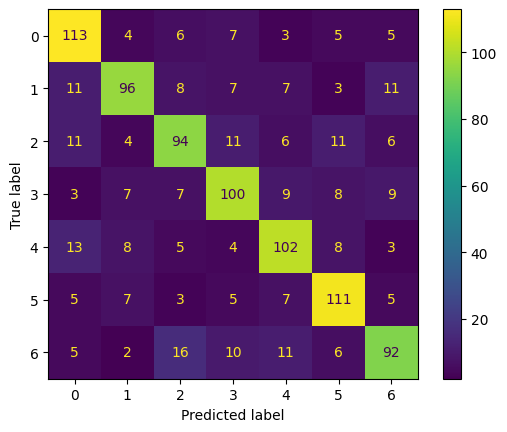

In [26]:
predictions = model.predict(X_test_tensor)

cm = confusion_matrix(y_test_tensor, predictions)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [27]:
#plot_decision_boundary_pytorch(X_test, y_test, model)

## Non-uniform Cost Matrix


We can increase the cost of predicting \textbf{class 1} when the true class is \textbf{class 2}, thus expecting less errors on the corresponding confusion matrix cell.

In [28]:
C = np.arange(1, n_classes+1).repeat(n_classes).reshape(n_classes, n_classes).T * (1 - np.eye(n_classes))
print(C)

model = NeuralNetClassifier(
    Model(input_dim=generator.n_features),
    #criterion=torch.nn.BCEWithLogitsLoss,
    criterion=MatrixCostLoss(C),
    optimizer=torch.optim.Adam,
    lr=0.001,
    max_epochs=500,
    batch_size=10,
    verbose=1,
    callbacks=[('estoper', EarlyStopping(monitor='valid_loss',
                                         patience = 50,
                                         threshold = 0.01,
                                         threshold_mode='rel',
                                         lower_is_better=True))]
)


model.fit(X_train_tensor, y_train_tensor)

[[0. 2. 3. 4. 5. 6. 7.]
 [1. 0. 3. 4. 5. 6. 7.]
 [1. 2. 0. 4. 5. 6. 7.]
 [1. 2. 3. 0. 5. 6. 7.]
 [1. 2. 3. 4. 0. 6. 7.]
 [1. 2. 3. 4. 5. 0. 7.]
 [1. 2. 3. 4. 5. 6. 0.]]
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.3820       0.1500        3.2825  0.0687
      2        3.1881       0.1500        3.1028  0.0683
      3        3.0007       0.1800        2.9303  0.0739
      4        2.8222       0.1900        2.7666  0.0734
      5        2.6548       0.1950        2.6128  0.0734
      6        2.4998       0.1900        2.4698  0.0701
      7        2.3580       0.1800        2.3380  0.0721
      8        2.2295       0.1950        2.2175  0.0647
      9        2.1136       0.2100        2.1080  0.0647
     10        2.0093       0.2000        2.0091  0.0650
     11        1.9158       0.2050        1.9198  0.0648
     12        1.8317       0.2000        1.8395  0.0650
     13        1.7562       0.205

    105        0.7912       0.2800        0.8176  0.0661
    106        0.7902       0.2800        0.8167  0.0666
    107        0.7892       0.2800        0.8159  0.0664
    108        0.7882       0.2800        0.8152  0.0679
    109        0.7872       0.2800        0.8144  0.0664
    110        0.7863       0.2800        0.8137  0.0664
    111        0.7854       0.2800        0.8130  0.0663
    112        0.7845       0.2800        0.8123  0.0663
    113        0.7836       0.2800        0.8116  0.0667
    114        0.7828       0.2800        0.8110  0.0665
    115        0.7820       0.2800        0.8104  0.0671
    116        0.7812       0.2800        0.8098  0.0685
    117        0.7804       0.2850        0.8092  0.0671
    118        0.7796       0.2850        0.8086  0.0669
    119        0.7788       0.2850        0.8081  0.0668
    120        0.7781       0.2850        0.8076  0.0689
    121        0.7774       0.2850        0.8070  0.0669
    122        0.7767       0.2

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Model(
    (layer1): Linear(in_features=7, out_features=7, bias=True)
  ),
)

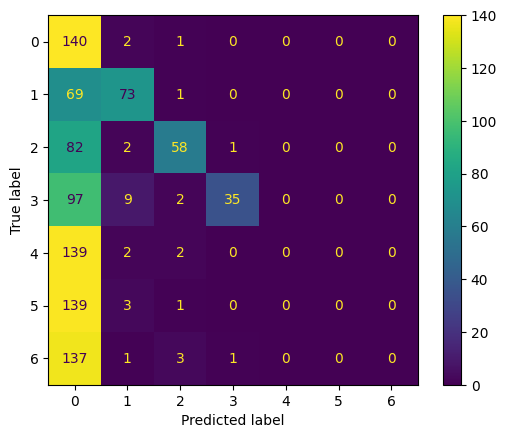

In [29]:
predictions = model.predict(X_test_tensor)

cm = confusion_matrix(y_test_tensor, predictions)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [30]:
#plot_decision_boundary_pytorch(X_test, y_test, model)